## Life Expectancy Multilinear Regression

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Life Expectancy Data.csv')
raw_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
raw_data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Slovenia,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [4]:
raw_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Checking why and which countries has null value for alcohol
null_alcohol = raw_data[raw_data["Alcohol"].isnull()]
#alcohol_na = raw_data.query('Alcohol == 0')
#alcohol_na
null_alcohol

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


 #Checking why there are 34 missing data in BMI

In [6]:
null_bmi = raw_data[raw_data[" BMI "].isnull()]
null_bmi

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0


In [7]:
## Turns out only Sudan and South Sudan do not report the BMI. We can use imputation for Monaco and San Marino from
## previous years because only one year missing from those countries. I will drop Sudan and South Sudan from the data

In [8]:
## Question: Does Life Expectancy have positive or negative relationship with drinking alcohol?
## Data is missing for almost every country in 2015, so I will drop the 2015 from the data
is_2015 = raw_data[raw_data["Year"]==2015].index
is_2015
data_wo_2015 = raw_data.drop(is_2015)
data_wo_2015

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
## South Sudan is a Muslim country without any Alcohol data, so I will drop South Sudan completely
is_s_sudan = data_wo_2015[data_wo_2015["Country"]=="South Sudan"].index
is_s_sudan
data_alcohol = data_wo_2015.drop(is_s_sudan)
data_alcohol

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [10]:
data_alcohol.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                              2
percentage expenditure               0
Hepatitis B                        529
Measles                              0
 BMI                                17
under-five deaths                    0
Polio                                8
Total expenditure                   33
Diphtheria                           8
 HIV/AIDS                            0
GDP                                411
Population                         611
 thinness  1-19 years               17
 thinness 5-9 years                 17
Income composition of resources    157
Schooling                          153
dtype: int64

In [11]:
data_1 = data_alcohol[data_alcohol['Life expectancy '].isnull()].index
data_1

Int64Index([624, 769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713], dtype='int64')

In [12]:
data_2 = data_alcohol.drop(data_1) 
data_2

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [13]:
na_bmi = data_2[data_2[" BMI "].isnull()].index
na_bmi

Int64Index([2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468,
            2469, 2470, 2471, 2472],
           dtype='int64')

In [14]:
data_3 = data_2.drop(na_bmi)
data_3

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
data_3.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              1
percentage expenditure               0
Hepatitis B                        524
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                8
Total expenditure                   33
Diphtheria                           8
 HIV/AIDS                            0
GDP                                406
Population                         603
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    150
Schooling                          150
dtype: int64

In [16]:
data_4 = data_3[data_3['Alcohol'].isnull()].index
data_4

Int64Index([1742], dtype='int64')

In [17]:
data_clean = data_3.drop(data_4)
data_clean.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        523
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                7
Total expenditure                   33
Diphtheria                           7
 HIV/AIDS                            0
GDP                                406
Population                         603
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    150
Schooling                          150
dtype: int64

In [18]:
## Dropping multiple columns at the same time.

In [19]:
to_drop = ["Hepatitis B", "Polio", "Total expenditure", "Diphtheria ", "GDP", "Population", "Income composition of resources","Schooling"]
data_clean.drop(to_drop, inplace=True, axis=1)

#passing in the inplace parameter as True and the axis parameter as 1. This tells Pandas that we want the changes to be made directly in our object and that it should look for the values to be dropped in the columns of the object.

In [20]:
#include='all' shows all the data not only numerical
data_clean.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
count,2714,2714.000000,2714,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
unique,181,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Slovenia,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,2234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.000737,NaN,69.189867,164.181282,30.686441,4.630814,797.716225,2499.415623,37.927598,42.594694,1.819049,4.872623,4.902763
std,NaN,4.321915,NaN,9.556044,125.469188,120.712659,4.055383,2056.972728,11750.102006,19.878414,164.489634,5.259353,4.441879,4.531226
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,1.000000,0.000000,0.100000,0.100000,0.100000
25%,NaN,2003.000000,NaN,63.200000,73.000000,0.000000,0.900000,10.695176,0.000000,19.000000,0.000000,0.100000,1.600000,1.600000
50%,NaN,2007.000000,NaN,72.100000,143.000000,3.000000,3.795000,82.304580,17.000000,43.050000,4.000000,0.100000,3.300000,3.350000
75%,NaN,2011.000000,NaN,75.600000,225.750000,21.000000,7.747500,499.165796,372.000000,55.800000,26.000000,0.800000,7.200000,7.300000


In [21]:
data_clean.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Measles                   0
 BMI                      0
under-five deaths         0
 HIV/AIDS                 0
 thinness  1-19 years     0
 thinness 5-9 years       0
dtype: int64

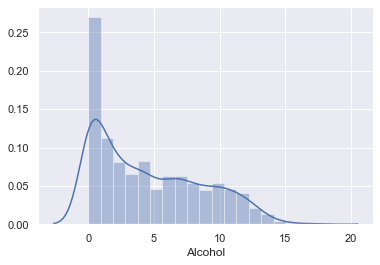

In [22]:
sns.distplot(data_clean["Alcohol"])

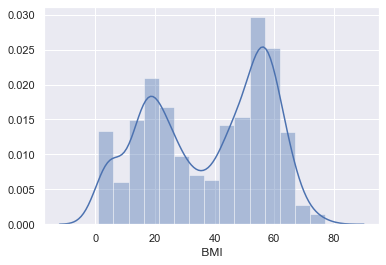

In [23]:
sns.distplot(data_clean[" BMI "])

In [24]:
# Based on the PDF, BMI is bimodel distrubition

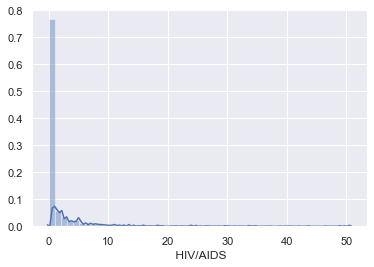

In [25]:
sns.distplot(data_clean[' HIV/AIDS'])

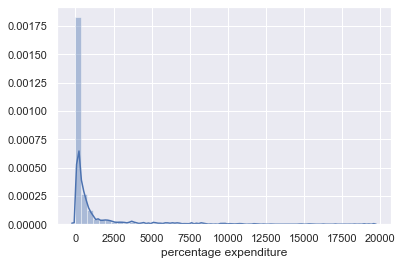

In [26]:
sns.distplot(data_clean['percentage expenditure'])

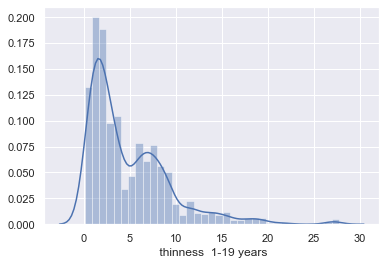

In [27]:
sns.distplot(data_clean[' thinness  1-19 years'])

In [28]:
round(data_clean[['Status','Life expectancy ']].groupby('Status').mean(),2)

,Life expectancy
Status,
Developed,79.10
Developing,67.06


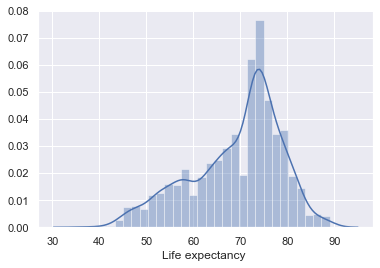

In [29]:
sns.distplot(data_clean['Life expectancy '])

In [30]:
data_clean["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [31]:
# Transform to categorical data to numerical data, 1 stands for "Developed countries, and 0 for "developing countries
data_clean["Status"] = data_clean["Status"].map({'Developed':1,'Developing':0})

In [32]:
data_clean['Status'].unique()


array([0, 1])

# OLS - Scatterplots for Life Expectancy vs Alcohol, BMI, HIV etc

## if we print all of them together
f,(ax1,ax2,ax3)= plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_clean['Status'], data_clean["Life expectancy "])
ax1.set_title("Life Expectancy vs Status")
ax2.scatter(data_clean['Alcohol'], data_clean["Life expectancy "])
ax2.set_title("Life Expectancy vs Alcohol")
ax3.scatter(data_clean[' BMI '], data_clean["Life expectancy "])
ax3.set_title("Life Expectancy vs BMI")


plt.show()

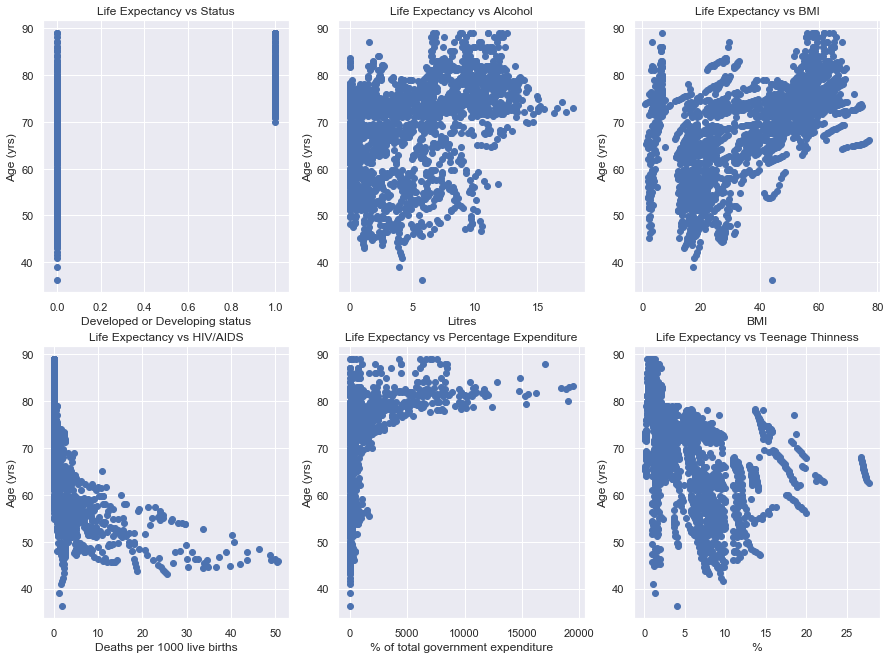

In [33]:
plt.figure(figsize=(15,35))

plt.subplot(6,3,1)
plt.scatter(data_clean['Status'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Status")
plt.xlabel('Developed or Developing status')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,2)
plt.scatter(data_clean['Alcohol'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Alcohol")
plt.xlabel('Litres')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,3)
plt.scatter(data_clean[' BMI '], data_clean["Life expectancy "])
plt.title("Life Expectancy vs BMI")
plt.xlabel('BMI')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,4)
plt.scatter(data_clean[' HIV/AIDS'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs HIV/AIDS")
plt.xlabel('Deaths per 1000 live births')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,5)
plt.scatter(data_clean['percentage expenditure'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Percentage Expenditure")
plt.xlabel('% of total government expenditure')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,6)
plt.scatter(data_clean[' thinness  1-19 years'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Teenage Thinness")
plt.xlabel('%')
plt.ylabel('Age (yrs)')

plt.show()

In [34]:
#It did not work but, box coxis a tranformation technic for the data not normaly distributed
# Try to transform Box-Cox, because the data is not normaly distributed

#from scipy import stats

# get values from our data_clean columns
#t_alcohol = np.asarray(data_clean['Alcohol'].values)

#tranfrom values and store as "d_t_"
#d_t_alcohol = stats.boxcox(t_alcohol)[0]

#plot the transformed data
#plt.hist(d_t_alcohol,bins=10)
#plt.show()

In [35]:
# I replace 0 with 0.01 in data_clean['percentage expenditure'] for better log transformation
data_clean['percentage expenditure'] = data_clean['percentage expenditure'].mask(data_clean['percentage expenditure']==0, 0.01)
data_clean['percentage expenditure']

1       73.523582
2       73.219243
3       78.184215
4        7.097109
5       79.679367
          ...    
2933     0.010000
2934     0.010000
2935     0.010000
2936     0.010000
2937     0.010000
Name: percentage expenditure, Length: 2714, dtype: float64

In [36]:
# Just because boxcox did not work, i will transform the x axis for hiv and percent expenditure, that are close to be linear relationship
log_hiv = np.log(data_clean[' HIV/AIDS'])
data_clean['log_hiv'] = log_hiv

log_expenditure = np.log(data_clean['percentage expenditure'])
data_clean['log_expenditure'] = log_expenditure

data_clean

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,log_hiv,log_expenditure
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,492,18.6,86,0.1,17.5,17.5,-2.302585,4.297606
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,430,18.1,89,0.1,17.7,17.7,-2.302585,4.293458
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,2787,17.6,93,0.1,17.9,18.0,-2.302585,4.359068
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,3013,17.2,97,0.1,18.2,18.2,-2.302585,1.959687
5,Afghanistan,2010,0,58.8,279.0,74,0.01,79.679367,1989,16.7,102,0.1,18.4,18.4,-2.302585,4.378011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.010000,31,27.1,42,33.6,9.4,9.4,3.514526,-4.605170
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.010000,998,26.7,41,36.7,9.8,9.9,3.602777,-4.605170
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.010000,304,26.3,40,39.8,1.2,1.3,3.683867,-4.605170
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.010000,529,25.9,39,42.1,1.6,1.7,3.740048,-4.605170


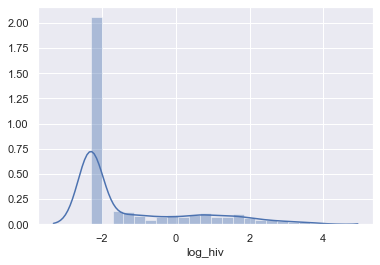

In [37]:
sns.distplot(data_clean['log_hiv'])

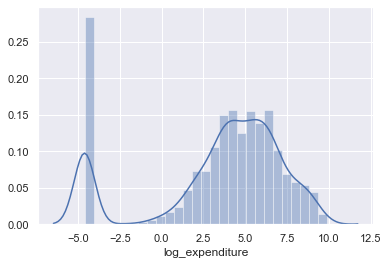

In [38]:
sns.distplot(data_clean['log_expenditure'])

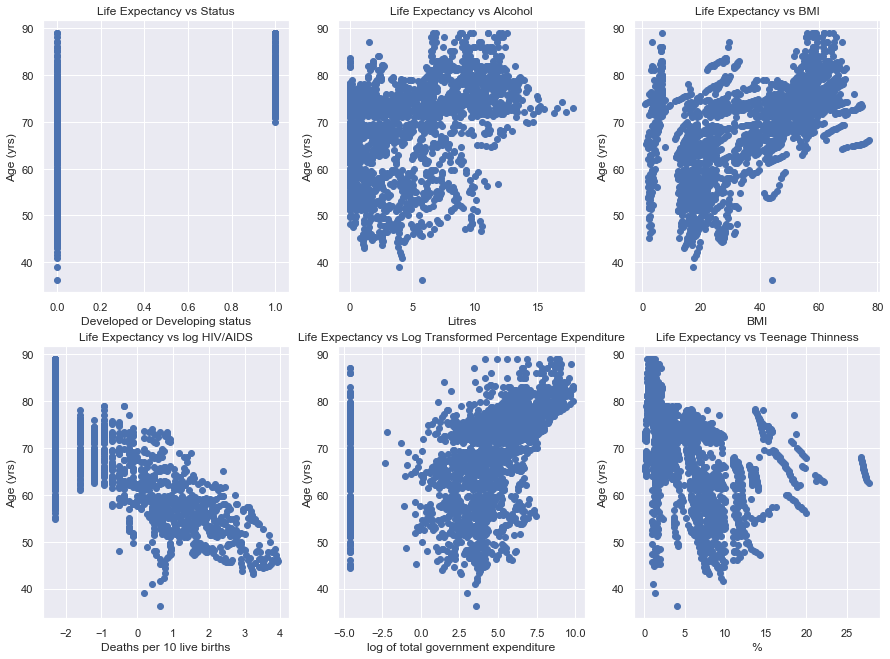

In [39]:
plt.figure(figsize=(15,35))

plt.subplot(6,3,1)
plt.scatter(data_clean['Status'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Status")
plt.xlabel('Developed or Developing status')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,2)
plt.scatter(data_clean['Alcohol'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Alcohol")
plt.xlabel('Litres')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,3)
plt.scatter(data_clean[' BMI '], data_clean["Life expectancy "])
plt.title("Life Expectancy vs BMI")
plt.xlabel('BMI')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,4)
plt.scatter(data_clean['log_hiv'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs log HIV/AIDS")
plt.xlabel('Deaths per 10 live births')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,5)
plt.scatter(data_clean['log_expenditure'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Log Transformed Percentage Expenditure")
plt.xlabel('log of total government expenditure')
plt.ylabel('Age (yrs)')

plt.subplot(6,3,6)
plt.scatter(data_clean[' thinness  1-19 years'], data_clean["Life expectancy "])
plt.title("Life Expectancy vs Teenage Thinness")
plt.xlabel('%')
plt.ylabel('Age (yrs)')

plt.show()

In [40]:
# Dropping the useless or pre-transformed data
drop_axis = [' HIV/AIDS','percentage expenditure']
data_clean.drop(drop_axis, inplace=True, axis=1)

In [41]:
#I do not need to write (include='all'), because I already transformed categorical data to numerical
data_clean.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,thinness 1-19 years,thinness 5-9 years,log_hiv,log_expenditure
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,2007.000737,0.176861,69.189867,164.181282,30.686441,4.630814,2499.415623,37.927598,42.594694,4.872623,4.902763,-1.211478,3.534055
std,4.321915,0.381621,9.556044,125.469188,120.712659,4.055383,11750.102006,19.878414,164.489634,4.441879,4.531226,1.632911,3.961639
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.100000,0.100000,-2.302585,-4.605170
25%,2003.000000,0.000000,63.200000,73.000000,0.000000,0.900000,0.000000,19.000000,0.000000,1.600000,1.600000,-2.302585,2.369790
50%,2007.000000,0.000000,72.100000,143.000000,3.000000,3.795000,17.000000,43.050000,4.000000,3.300000,3.350000,-2.302585,4.410411
75%,2011.000000,0.000000,75.600000,225.750000,21.000000,7.747500,372.000000,55.800000,26.000000,7.200000,7.300000,-0.223144,6.212936
max,2014.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,212183.000000,77.100000,2500.000000,27.700000,28.600000,3.923952,9.877139


(Based on the OLS assumptions, there is no obvious linear connection,
however just for practicing I will continue using linear regression model, also so far I do not know any other :) )

# Multicollinearity

In [42]:
# One of the best ways to check for multicollinearity is VIF(variance inflation factor)
data_clean.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Measles ', ' BMI ',
       'under-five deaths ', ' thinness  1-19 years',
       ' thinness 5-9 years', 'log_hiv', 'log_expenditure'], dtype=object)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_clean[['Status','Alcohol',' BMI ', ' thinness  1-19 years','log_hiv', 'log_expenditure']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(var.values,i) for i in range(var.shape[1])]
vif['features'] = var.columns

In [44]:
#VIF = 1: no multicollinearity
# 1<VIF < 5: perfectly okay
#10 < VIF : unacceptable (there is no upperlimit and different sources are saying different numbers, but for acceptance try to keep under 5)

vif

,VIF,features
0,2.042122,Status
1,3.433392,Alcohol
2,4.357610,BMI
3,1.436256,thinness 1-19 years
4,2.135364,log_hiv
5,1.910403,log_expenditure


In [45]:
# all my data is VIF<5, which is awesome because I do not need to remove any column

# Create dummy variables

In [46]:
# if we have N categories for a feature, we have to create N-1 dummies
data_w_dummies = pd.get_dummies(data_clean, drop_first=True)

In [47]:
data_w_dummies.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,thinness 1-19 years,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
1,2014,0,59.9,271.0,64,0.01,492,18.6,86,17.5,...,0,0,0,0,0,0,0,0,0,0
2,2013,0,59.9,268.0,66,0.01,430,18.1,89,17.7,...,0,0,0,0,0,0,0,0,0,0
3,2012,0,59.5,272.0,69,0.01,2787,17.6,93,17.9,...,0,0,0,0,0,0,0,0,0,0
4,2011,0,59.2,275.0,71,0.01,3013,17.2,97,18.2,...,0,0,0,0,0,0,0,0,0,0
5,2010,0,58.8,279.0,74,0.01,1989,16.7,102,18.4,...,0,0,0,0,0,0,0,0,0,0


## Rearrange a bit

In [48]:
data_w_dummies.columns.values

array(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Measles ', ' BMI ',
       'under-five deaths ', ' thinness  1-19 years',
       ' thinness 5-9 years', 'log_hiv', 'log_expenditure',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Antigua and Barbuda', 'Country_Argentina',
       'Country_Armenia', 'Country_Australia', 'Country_Austria',
       'Country_Azerbaijan', 'Country_Bahamas', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Barbados', 'Country_Belarus',
       'Country_Belgium', 'Country_Belize', 'Country_Benin',
       'Country_Bhutan', 'Country_Bolivia (Plurinational State of)',
       'Country_Bosnia and Herzegovina', 'Country_Botswana',
       'Country_Brazil', 'Country_Brunei Darussalam', 'Country_Bulgaria',
       'Country_Burkina Faso', 'Country_Burundi', 'Country_Cabo Verde',
       'Country_Cambodia', 'Country_Cameroon', 'Country_Canada',
       'Country_Central African Republic'

In [49]:
cols =['Life expectancy ', 'Status',
       'Alcohol', ' BMI ',
       ' thinness  1-19 years',
        'log_hiv', 'log_expenditure',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Antigua and Barbuda', 'Country_Argentina',
       'Country_Armenia', 'Country_Australia', 'Country_Austria',
       'Country_Azerbaijan', 'Country_Bahamas', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Barbados', 'Country_Belarus',
       'Country_Belgium', 'Country_Belize', 'Country_Benin',
       'Country_Bhutan', 'Country_Bolivia (Plurinational State of)',
       'Country_Bosnia and Herzegovina', 'Country_Botswana',
       'Country_Brazil', 'Country_Brunei Darussalam', 'Country_Bulgaria',
       'Country_Burkina Faso', 'Country_Burundi', 'Country_Cabo Verde',
       'Country_Cambodia', 'Country_Cameroon', 'Country_Canada',
       'Country_Central African Republic', 'Country_Chad',
       'Country_Chile', 'Country_China', 'Country_Colombia',
       'Country_Comoros', 'Country_Congo', 'Country_Costa Rica',
       'Country_Croatia', 'Country_Cuba', 'Country_Cyprus',
       'Country_Czechia', "Country_Côte d'Ivoire",
       "Country_Democratic People's Republic of Korea",
       'Country_Democratic Republic of the Congo', 'Country_Denmark',
       'Country_Djibouti', 'Country_Dominican Republic',
       'Country_Ecuador', 'Country_Egypt', 'Country_El Salvador',
       'Country_Equatorial Guinea', 'Country_Eritrea', 'Country_Estonia',
       'Country_Ethiopia', 'Country_Fiji', 'Country_Finland',
       'Country_France', 'Country_Gabon', 'Country_Gambia',
       'Country_Georgia', 'Country_Germany', 'Country_Ghana',
       'Country_Greece', 'Country_Grenada', 'Country_Guatemala',
       'Country_Guinea', 'Country_Guinea-Bissau', 'Country_Guyana',
       'Country_Haiti', 'Country_Honduras', 'Country_Hungary',
       'Country_Iceland', 'Country_India', 'Country_Indonesia',
       'Country_Iran (Islamic Republic of)', 'Country_Iraq',
       'Country_Ireland', 'Country_Israel', 'Country_Italy',
       'Country_Jamaica', 'Country_Japan', 'Country_Jordan',
       'Country_Kazakhstan', 'Country_Kenya', 'Country_Kiribati',
       'Country_Kuwait', 'Country_Kyrgyzstan',
       "Country_Lao People's Democratic Republic", 'Country_Latvia',
       'Country_Lebanon', 'Country_Lesotho', 'Country_Liberia',
       'Country_Libya', 'Country_Lithuania', 'Country_Luxembourg',
       'Country_Madagascar', 'Country_Malawi', 'Country_Malaysia',
       'Country_Maldives', 'Country_Mali', 'Country_Malta',
       'Country_Mauritania', 'Country_Mauritius', 'Country_Mexico',
       'Country_Micronesia (Federated States of)', 'Country_Mongolia',
       'Country_Montenegro', 'Country_Morocco', 'Country_Mozambique',
       'Country_Myanmar', 'Country_Namibia', 'Country_Nepal',
       'Country_Netherlands', 'Country_New Zealand', 'Country_Nicaragua',
       'Country_Niger', 'Country_Nigeria', 'Country_Norway',
       'Country_Oman', 'Country_Pakistan', 'Country_Panama',
       'Country_Papua New Guinea', 'Country_Paraguay', 'Country_Peru',
       'Country_Philippines', 'Country_Poland', 'Country_Portugal',
       'Country_Qatar', 'Country_Republic of Korea',
       'Country_Republic of Moldova', 'Country_Romania',
       'Country_Russian Federation', 'Country_Rwanda',
       'Country_Saint Lucia', 'Country_Saint Vincent and the Grenadines',
       'Country_Samoa', 'Country_Sao Tome and Principe',
       'Country_Saudi Arabia', 'Country_Senegal', 'Country_Serbia',
       'Country_Seychelles', 'Country_Sierra Leone', 'Country_Singapore',
       'Country_Slovakia', 'Country_Slovenia', 'Country_Solomon Islands',
       'Country_Somalia', 'Country_South Africa', 'Country_Spain',
       'Country_Sri Lanka', 'Country_Suriname', 'Country_Swaziland',
       'Country_Sweden', 'Country_Switzerland',
       'Country_Syrian Arab Republic', 'Country_Tajikistan',
       'Country_Thailand',
       'Country_The former Yugoslav republic of Macedonia',
       'Country_Timor-Leste', 'Country_Togo', 'Country_Tonga',
       'Country_Trinidad and Tobago', 'Country_Tunisia', 'Country_Turkey',
       'Country_Turkmenistan', 'Country_Uganda', 'Country_Ukraine',
       'Country_United Arab Emirates',
       'Country_United Kingdom of Great Britain and Northern Ireland',
       'Country_United Republic of Tanzania',
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe']

In [50]:
data_preprocessed = data_w_dummies[cols]
data_preprocessed.head()

,Life expectancy,Status,Alcohol,BMI,thinness 1-19 years,log_hiv,log_expenditure,Country_Albania,Country_Algeria,Country_Angola,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
1,59.9,0,0.01,18.6,17.5,-2.302585,4.297606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.9,0,0.01,18.1,17.7,-2.302585,4.293458,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,59.5,0,0.01,17.6,17.9,-2.302585,4.359068,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59.2,0,0.01,17.2,18.2,-2.302585,1.959687,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,58.8,0,0.01,16.7,18.4,-2.302585,4.378011,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression Model

## Declare the inputs and the targets


In [51]:
targets = data_preprocessed['Life expectancy ']
inputs = data_preprocessed.drop(['Life expectancy '], axis=1)

## Scale the data

In [52]:
## Scaling dummies are not actually recommended, but so far I do not know the selective scaling so 
## only for this example I will go for it

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
inputs_scaled = scaler.transform(inputs)

In [79]:
inputs_scaled

array([[-0.46353127, -1.13963741, -0.97246991, ..., -0.07454941,
        -0.07454941, -0.07454941],
       [-0.46353127, -1.13963741, -0.99762746, ..., -0.07454941,
        -0.07454941, -0.07454941],
       [-0.46353127, -1.13963741, -1.022785  , ..., -0.07454941,
        -0.07454941, -0.07454941],
       ...,
       [-0.46353127, -0.04952709, -0.58504368, ..., -0.07454941,
        -0.07454941, 13.41392311],
       [-0.46353127, -0.7178979 , -0.60516972, ..., -0.07454941,
        -0.07454941, 13.41392311],
       [-0.46353127, -0.72776315, -0.62529575, ..., -0.07454941,
        -0.07454941, 13.41392311]])

## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#test_size= 0.2 means 20/80 split between test and train and random_state makes fix randomize for future tests

## Create the regression

In [56]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_hat = reg.predict(x_train)

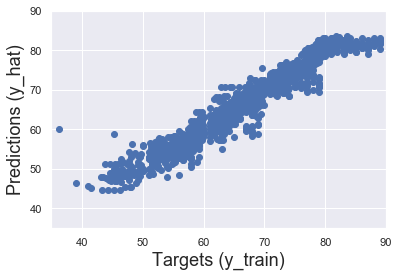

In [58]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size =18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

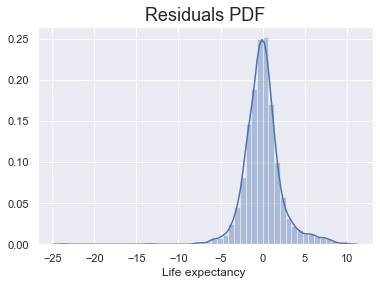

In [59]:
## Residual plot
## Residual = Differences between the targets and the predictions 
## The residuals are estimates of the errors and expected to behave normality and homoscedasticity

sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size =18)
  

It is normaly distrubuted however there is a much longer tail in the negative side therefore there are certain observations for which (y_train -y_hat) is much lower than the mean ( a much higher life expectancy is predicted than is observed)

### R_ Square

In [60]:
reg.score(x_train, y_train)

0.945235301292613

R-Square is around 95 percent, it means our model is explaining 95% of the variablity of the data

### Adjusted R_Square

In [61]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [62]:
adj_r2(x_train,y_train)

0.9401011107887955

## Finding the weights and bias

In [63]:
## bias == intercept (ML term)

reg.intercept_

69.15163628794751

In [64]:
## weight == coefficient (ML term) Bigger weight is bigger impact
reg.coef_

array([-6.82186032e+12, -8.54492188e-01,  2.23632812e-01, -3.44238281e-02,
       -4.60351562e+00,  7.15087891e-01,  1.29614258e+00,  1.09765625e+00,
        6.72607422e-02,  1.38067627e+00,  1.31243896e+00,  1.15478516e+00,
        1.32552429e+12,  1.32552429e+12,  8.94775391e-01,  1.47845459e+00,
        1.27435303e+00,  8.54736328e-01,  1.38665771e+00,  1.03540039e+00,
        1.32552429e+12,  1.11367798e+00,  5.71044922e-01,  7.47985840e-01,
        9.03869629e-01,  1.35327148e+00,  8.46237183e-01,  1.19787598e+00,
        1.32925415e+00,  1.32552429e+12,  4.51293945e-01,  5.46020508e-01,
        1.51824951e+00,  9.20104980e-01,  6.24038696e-01,  1.77239990e+00,
        2.31781006e-01,  1.77520752e-01,  1.59506226e+00,  1.25372314e+00,
        1.13241577e+00,  3.74816895e-01,  1.01748657e+00,  1.51043701e+00,
        1.32552429e+12,  1.49377441e+00,  1.32552429e+12,  1.32552429e+12,
        3.69842529e-01,  9.67895508e-01,  5.53405762e-01,  1.32552429e+12,
        9.24011230e-01,  

In [65]:
## For readablity, I will make summary table
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary["Weights"] = reg.coef_
reg_summary.head(20)

,Features,Weights
0,Status,-6.821860e+12
1,Alcohol,-8.544922e-01
2,BMI,2.236328e-01
3,thinness 1-19 years,-3.442383e-02
4,log_hiv,-4.603516e+00
5,log_expenditure,7.150879e-01
6,Country_Albania,1.296143e+00
7,Country_Algeria,1.097656e+00
8,Country_Angola,6.726074e-02
9,Country_Antigua and Barbuda,1.380676e+00


Weights interpretation
-- Continuous variables
1. A positive weight shows that as a feature increases in value, so do the life expectancy ( in this case of BMI increases (you are not starving - you live longer or living in developed country (status = 1) increases your life)
2. A negative weight shows that as a feature increases in value, life_expectancy decrease

In [66]:
## Finding the benchmark - based on the dummies which one is 1 - in our case benchmark is Afghanistan
data_clean['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In our case (because of alphabetically assigned dummies- our benchmark is Afghanistan)
Weights interpretation -- Dummy variables
1. A positive weight shows that the respective category ( Country ) has longer life expectancy than benchmark (Afghanistan)
2. A negative weight shows that the respective category ( Country ) has shorter life expectancy than benchmark (Afghanistan)

## Testing

In [67]:
y_hat_test = reg.predict(x_test)

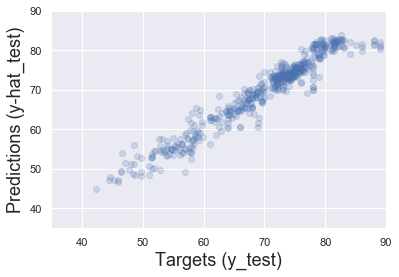

In [68]:
## alpha gives opactiy which can used for seeing which area has more density,
## the more saturated the color, the higher the concentration
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y-hat_test)", size=18)
plt.xlim(35,90)
plt.ylim(35,90)
plt.show()

in this case we can predict more longer life expectancy, because it is more dense

In [69]:
## df_pf == DataFrame Performance for seeing how accurate is our predictions

df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf


,Prediction
0,72.826197
1,69.500757
2,81.563746
3,73.980738
4,74.674830
...,...
538,71.568384
539,54.829859
540,71.605738
541,70.705836


In [70]:
df_pf["Target"] = y_test
df_pf

,Prediction,Target
0,72.826197,NaN
1,69.500757,NaN
2,81.563746,59.9
3,73.980738,NaN
4,74.674830,NaN
...,...,...
538,71.568384,NaN
539,54.829859,NaN
540,71.605738,48.4
541,70.705836,NaN


In [71]:
## We need to reset the indexes, because or the random_scale
y_test = y_test.reset_index(drop=True)
y_test.head()

0    71.8
1    67.1
2    78.0
3    74.7
4    74.1
Name: Life expectancy , dtype: float64

In [72]:
df_pf["Target"] = y_test
df_pf

,Prediction,Target
0,72.826197,71.8
1,69.500757,67.1
2,81.563746,78.0
3,73.980738,74.7
4,74.674830,74.1
...,...,...
538,71.568384,69.4
539,54.829859,53.3
540,71.605738,72.1
541,70.705836,78.0


In [73]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [74]:
## Whether an observation is off by +1% or -1% is mostly irrelevant
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [75]:
df_pf

,Prediction,Target,Residual,Difference%
0,72.826197,71.8,-1.026197,1.429244
1,69.500757,67.1,-2.400757,3.577880
2,81.563746,78.0,-3.563746,4.568905
3,73.980738,74.7,0.719262,0.962868
4,74.674830,74.1,-0.574830,0.775749
...,...,...,...,...
538,71.568384,69.4,-2.168384,3.124473
539,54.829859,53.3,-1.529859,2.870279
540,71.605738,72.1,0.494262,0.685523
541,70.705836,78.0,7.294164,9.351493


In [76]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,543.000000,543.000000,543.000000,543.000000
mean,69.896357,69.989503,0.093145,2.465602
std,9.066384,9.360241,2.351652,2.479903
min,44.794703,42.300000,-7.470337,0.000248
25%,64.533472,64.750000,-1.228370,0.755575
50%,72.689722,72.700000,-0.060328,1.581998
75%,75.700586,76.000000,1.114379,3.238467
max,83.930933,89.000000,8.606664,15.716947


Based on the df_pf, my model works quite well! Min difference is almost 0% and max difference is 15%

In [77]:
## checking all of the data
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
224,68.80,68.80,0.00,0.00
450,67.30,67.30,-0.00,0.00
10,79.81,79.80,-0.01,0.01
460,63.91,63.90,-0.01,0.01
315,74.22,74.20,-0.02,0.02
242,74.22,74.20,-0.02,0.02
425,73.46,73.50,0.04,0.05
370,82.74,82.70,-0.04,0.05
426,74.96,75.00,0.04,0.05
531,81.36,81.40,0.04,0.05


In the Redidual PDF, negative tail was longer and assuming the model will predict higher than it should be, so when I check the data, it actually true.. Predictions are slightly higher than WHO Life Expectancy